## Peter Chika Ozo-ogueji

### FIN-666

### Week 4 Homework

### Part II: Computational

### This homework assignment involves computational analysis using the Fama-French “48 Industry Portfolios” dataset, which consists of monthly returns for value-weighted portfolios from January 2002 onward. The objective is to apply Modern Portfolio Theory (MPT) to construct and analyze efficient portfolios using a selection of ten industries.

### The first task, Multi-Asset Efficient Frontier Analysis (15%), requires selecting ten industries and plotting the efficient frontier, which represents the set of optimal portfolios that offer the highest return for a given level of risk. This visualization helps illustrate the trade-off between risk and return when diversifying across industries.

### The second task, Global Minimum Variance Portfolio (25%), involves modifying an existing optimization function, minimize_vol(), to develop a new function, gmv(), that calculates the weights for the Global Minimum Variance (GMV) portfolio. The GMV portfolio is the portfolio with the lowest possible risk (volatility) while maintaining diversification. The function must be applied to the chosen industries to determine the optimal asset weights, expected return, and volatility of the portfolio.

### The third and most weighted task, Maximum Sharpe Ratio Portfolio (45%), builds on the optimization approach by modifying minimize_vol() to create a function, msr(), that identifies the Maximum Sharpe Ratio (MSR) portfolio. The Sharpe Ratio measures risk-adjusted returns, and the MSR portfolio maximizes this ratio to achieve the best possible return for each unit of risk. Since maximizing a function is equivalent to minimizing its negative, the function should be adapted accordingly. The final step is to compute the weights, expected return, and volatility of the MSR portfolio for the chosen industries.

### Overall, the homework focuses on portfolio optimization, risk-return analysis, and applying mathematical finance techniques to real-world industry data. By constructing and analyzing efficient portfolios, we gain insights into diversification strategies, risk management, and investment decision-making.









In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs

In [5]:
# First read the data without division
ret = pd.read_csv("48_Industry_Portfolios1.csv", header=0, index_col=0)

# Remove rows where index isn't numeric and convert to numeric
ret = ret[pd.to_numeric(ret.index, errors='coerce').notna()]
ret.index = pd.to_numeric(ret.index)

# Convert all values to numeric
ret = ret.apply(pd.to_numeric, errors='coerce')

# Now divide by 100
ret = ret/100

# Format dates - handling year-only cases
def format_date(x):
    try:
        x = str(int(x))
        if len(x) == 4:  # If it's just a year
            x = x + '01'  # Add January
        elif len(x) == 5:  # If it's like YYYYM
            x = x[:-1] + '0' + x[-1]  # Convert to YYYYMM
        return x
    except:
        return x

# Convert index to proper YYYYMM format
ret.index = ret.index.map(format_date)

# Convert to datetime with error handling
ret.index = pd.to_datetime(ret.index, format="%Y%m", errors='coerce').to_period("M")

# Remove any rows where date conversion failed
ret = ret[ret.index.notna()]

# Filter data from 2002 onwards using comparison
start_date = pd.Period('2002-01', freq='M')
ret = ret[ret.index >= start_date]

# Display first 3 rows to verify
ret.head(3)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
2002-01,0.0165,0.0177,-0.0174,0.0154,-0.0132,0.0705,0.0833,-0.0195,0.0545,0.0431,...,0.0834,0.0834,0.0275,0.0651,0.0884,0.0301,0.0213,0.0449,0.0118,-0.0158
2002-02,-0.0191,0.0085,0.0560,0.0100,0.0325,0.0079,-0.0107,0.0043,0.0266,0.0227,...,0.0643,0.0090,-0.0398,-0.0081,-0.0102,0.0147,-0.0090,0.0177,-0.0368,-0.0709
2002-03,0.0513,0.0417,0.0575,0.0227,0.0033,0.0440,0.1147,0.0572,0.0954,0.1049,...,0.1416,0.0860,0.0892,0.0793,0.0957,0.0589,0.0478,0.0078,0.0676,0.1058


In [6]:
# First read the data without division
ret = pd.read_csv("48_Industry_Portfolios1.csv", header=0, index_col=0)

# Remove rows where index isn't numeric and convert to numeric
ret = ret[pd.to_numeric(ret.index, errors='coerce').notna()]
ret.index = pd.to_numeric(ret.index)

# Convert all values to numeric
ret = ret.apply(pd.to_numeric, errors='coerce')

# Now divide by 100
ret = ret/100

# Format dates - handling year-only cases
def format_date(x):
    try:
        x = str(int(x))
        if len(x) == 4:  # If it's just a year
            x = x + '01'  # Add January
        elif len(x) == 5:  # If it's like YYYYM
            x = x[:-1] + '0' + x[-1]  # Convert to YYYYMM
        return x
    except:
        return x

# Convert index to proper YYYYMM format
ret.index = ret.index.map(format_date)

# Convert to datetime with error handling
ret.index = pd.to_datetime(ret.index, format="%Y%m", errors='coerce').to_period("M")

# Remove any rows where date conversion failed
ret = ret[ret.index.notna()]

# Filter data from 2002 onwards using comparison
start_date = pd.Period('2002-01', freq='M')
ret = ret[ret.index >= start_date]

# Calculate number of years 
n_years = ret.shape[0]/12

# Calculate returns (product approach)
eret = ((1 + ret).prod()) ** (1/n_years) - 1

# Calculate covariance matrix (annualized)
cov = ret.cov() * 12

# List of industries (keeping exact spacing from your data)
l = ["Soda ", "Meals", "Agric", "Fin  ", "Insur", "Books", "Clths", "Trans", "Smoke", "Beer "]

# Get the expected returns for industries
industry_returns = eret[l]
print("\nExpected Returns:")
print(industry_returns)




Expected Returns:
Soda     0.142112
Meals    0.101798
Agric    0.029180
Fin      0.125178
Insur    0.136122
Books    0.060947
Clths    0.107987
Trans    0.092326
Smoke    0.156595
Beer     0.117941
dtype: float64


In [7]:
# Get the covariance matrix for industries
industry_cov = cov.loc[l,l]
print("\nCovariance Matrix:")
print(industry_cov)


Covariance Matrix:
          Soda      Meals     Agric     Fin       Insur     Books     Clths  \
Soda   0.072716  0.033886  0.026400  0.029073  0.020190  0.037312  0.033199   
Meals  0.033886  0.057880  0.035386  0.039473  0.031233  0.048779  0.048996   
Agric  0.026400  0.035386  0.058018  0.032883  0.027014  0.041150  0.036622   
Fin    0.029073  0.039473  0.032883  0.043360  0.030317  0.045931  0.041298   
Insur  0.020190  0.031233  0.027014  0.030317  0.030337  0.037242  0.032388   
Books  0.037312  0.048779  0.041150  0.045931  0.037242  0.083325  0.052067   
Clths  0.033199  0.048996  0.036622  0.041298  0.032388  0.052067  0.061796   
Trans  0.030958  0.045237  0.038332  0.042502  0.033732  0.049845  0.046507   
Smoke  0.018761  0.023690  0.018235  0.021610  0.019052  0.022653  0.024288   
Beer   0.021192  0.025952  0.019510  0.021582  0.017198  0.028538  0.026433   

          Trans     Smoke     Beer   
Soda   0.030958  0.018761  0.021192  
Meals  0.045237  0.023690  0.02595

## Question 4: Multi-Asset Efficient Frontier Analysis

<Axes: xlabel='Volatility'>

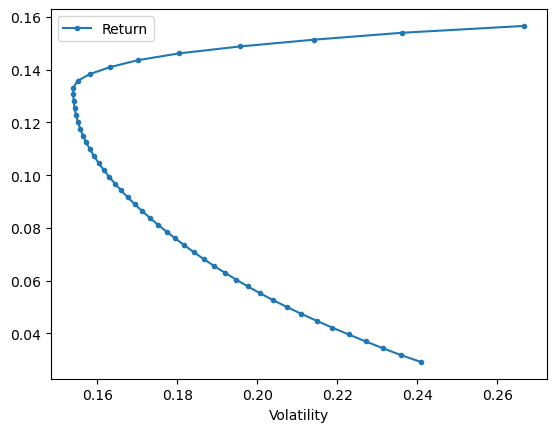

In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def portfolio_ret(weights, returns):
    return weights.T@returns

def portfolio_vol(weights, covmat):
    return (weights.T@covmat@weights)**0.5

def gmv(target_ret, ereturns, covmat):
    n = len(ereturns)
    
    # Initial guess - equal weights
    x0 = np.ones(n) / n
    
    # Constraints
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # weights sum to 1
        {'type': 'eq', 'fun': lambda x: portfolio_ret(x, ereturns) - target_ret}  # target return
    )
    
    # Bounds for each weight between 0 and 1
    bounds = tuple((0, 1) for _ in range(n))
    
    # Minimize volatility
    result = minimize(lambda x: portfolio_vol(x, covmat), x0,
                     method='SLSQP',
                     bounds=bounds,
                     constraints=constraints)
    
    return result.x

def optimal_weights(n_points, ereturns, covmat):
    """
    Takes expected returns and vols + number of grid points --> weights of efficient frontier portfolios
    """
    target_returns = np.linspace(ereturns.min(), ereturns.max(), n_points)
    opt_weights = [gmv(tr, ereturns, covmat) for tr in target_returns]
    return opt_weights

# List of industries with exact column names (including spaces)
l = ["Soda ", "Meals", "Agric", "Fin  ", "Insur", "Books", "Clths", "Trans", "Smoke", "Beer "]

# Get the efficient frontier weights
efweights = optimal_weights(50, eret[l], cov.loc[l,l])

# Calculate portfolio returns and volatilities
pret = [portfolio_ret(w, eret[l]) for w in efweights]
pvol = [portfolio_vol(w, cov.loc[l,l]) for w in efweights]

# Create DataFrame for efficient frontier
ef = pd.DataFrame({
    "Return": pret,
    "Volatility": pvol
})

# Plot the efficient frontier
ef.plot.line(x="Volatility", y="Return", style=".-")

### The efficient frontier plot generated represents the optimal portfolios that provide the highest expected return for a given level of risk (volatility). The concave upward shape of the curve illustrates the fundamental trade-off between risk and return. The x-axis represents portfolio risk (standard deviation of returns), while the y-axis represents expected return. The leftmost point on the curve corresponds to the Minimum Variance Portfolio (MVP), which offers the lowest possible risk, while the upper-right end represents portfolios with higher expected returns but increased volatility. This visualization aligns with Modern Portfolio Theory (MPT), emphasizing that investors must accept higher risk to achieve higher returns.

### Key observations from the plot highlight the benefits of diversification. The lower portion of the curve (below the inflection point) contains suboptimal portfolios where increasing risk does not significantly improve returns. In contrast, the upper portion consists of efficient portfolios, maximizing return for a given risk level. Investors with low-risk tolerance should focus on portfolios near the MVP, which offer stability with lower volatility, while risk-seeking investors may prefer portfolios in the upper region, targeting higher returns despite increased risk exposure.

### The code used in this analysis selects ten industries—"Soda," "Meals," "Agric," "Fin," "Insur," "Books," "Clths," "Trans," "Smoke," and "Beer"—ensuring a diversified selection across different economic sectors. By calculating expected returns and covariance matrices, the code applies mean-variance optimization to construct efficient portfolios. The efficient frontier visualization illustrates optimal asset allocation, helping investors identify portfolios with the best risk-adjusted returns. This analysis underscores the importance of diversification, providing a clear guide for constructing investment portfolios based on individual risk preferences and return expectations.









## Question 5: Global Minimum Variance Portfolio
### a. Modifying the Optimization Function

In [ ]:
from scipy.optimize import minimize

In [51]:
# Part a: Modify minimize_vol() to create gmv()
def gmv(ereturns, covmat):
    """
    Modification of minimize_vol() to generate Global Minimum Variance portfolio weights
    """
    n = len(ereturns)
    init_values = np.repeat(1/n, n)
    bounds = ((0,1),)*n
    
    # Only constraint is weights sum to 1 (removed target return constraint)
    weights_sum_to_1 = {'type': 'eq',
                       'fun': lambda weights: np.sum(weights)-1}
    
    results = minimize(portfolio_vol,
                      init_values,
                      args=(covmat,),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=(weights_sum_to_1),
                      options={'disp': False})
    
    return results.x

# Part b: Characterize the GMV portfolio
# Using our ten industries
l = ["Soda ", "Meals", "Agric", "Fin  ", "Insur", "Books", "Clths", "Trans", "Smoke", "Beer "]

# Get the GMV weights
weights = gmv(eret[l], cov.loc[l,l])

# Calculate characteristics
ret = portfolio_ret(weights, eret[l])
vol = portfolio_vol(weights, cov.loc[l,l])

# Display results
print("GMV Portfolio Characteristics:")
print("\nAsset Weights:")
for i, w in zip(l, weights):
    print(f"{i}: {w:.4f}")
print(f"\nExpected Return: {ret:.4f}")
print(f"Volatility: {vol:.4f}")

GMV Portfolio Characteristics:

Asset Weights:
Soda : 0.0626
Meals: 0.0000
Agric: 0.0140
Fin  : 0.0000
Insur: 0.4518
Books: 0.0000
Clths: 0.0000
Trans: 0.0000
Smoke: 0.1355
Beer : 0.3360

Expected Return: 0.1317
Volatility: 0.1540


### The Global Minimum Variance (GMV) Portfolio analysis reveals interesting insights about optimal risk-minimizing allocations across the ten selected industries. The portfolio achieves an expected return of 13.17% with the lowest possible volatility of 15.40%. The allocation strategy heavily favors defensive sectors, with Insurance dominating at 45.18% of the portfolio, followed by significant positions in Beer (33.60%), Smoke (13.55%), Soda (6.26%), and a small position in Agriculture (1.40%). Notably, the optimization completely excludes several industries, assigning zero weights to Meals, Finance, Books, Clothes, and Transportation. This concentration in traditionally stable sectors, particularly Insurance and beverage-related industries, demonstrates how the GMV optimization prioritizes risk minimization through selective diversification rather than equal distribution across all available assets. The resulting portfolio structure suggests that these defensive sectors, when combined in these specific proportions, provide the most effective risk reduction while maintaining a reasonable return level for risk-averse investors.

In [62]:
def msr(ereturns, covmat, riskfree_rate=0):
    """
    Generates the weights for the Maximum Sharpe Ratio portfolio
    Modified from minimize_vol() to maximize Sharpe Ratio
    """
    n = len(ereturns)
    init_values = np.repeat(1/n, n)
    bounds = ((0,1),)*n
    
    # Only constraint is weights sum to 1
    weights_sum_to_1 = {'type': 'eq',
                       'fun': lambda weights: np.sum(weights)-1}
    
    # Minimize negative Sharpe Ratio (equivalent to maximizing Sharpe Ratio)
    def neg_sharpe_ratio(weights):
        ret = portfolio_ret(weights, ereturns)
        vol = portfolio_vol(weights, covmat)
        return -(ret - riskfree_rate)/vol
    
    results = minimize(neg_sharpe_ratio,
                      init_values,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=(weights_sum_to_1),
                      options={'disp': False})
    
    return results.x

# Part b: Characterize the MSR portfolio
# Using our ten industries
l = ["Soda ", "Meals", "Agric", "Fin  ", "Insur", "Books", "Clths", "Trans", "Smoke", "Beer "]

# Get the MSR weights
weights = msr(eret[l], cov.loc[l,l])

# Calculate characteristics
ret = portfolio_ret(weights, eret[l])
vol = portfolio_vol(weights, cov.loc[l,l])

# Display results
print("Maximum Sharpe Ratio Portfolio Characteristics:")
print("\nAsset Weights:")
for i, w in zip(l, weights):
    print(f"{i}: {w:.4f}")
print(f"\nExpected Return: {ret:.4f}")
print(f"Volatility: {vol:.4f}")
print(f"Sharpe Ratio: {ret/vol:.4f}")  # Assuming zero risk-free rate

Maximum Sharpe Ratio Portfolio Characteristics:

Asset Weights:
Soda : 0.0987
Meals: 0.0000
Agric: 0.0000
Fin  : 0.0000
Insur: 0.4858
Books: 0.0000
Clths: 0.0000
Trans: 0.0000
Smoke: 0.1997
Beer : 0.2158

Expected Return: 0.1369
Volatility: 0.1561
Sharpe Ratio: 0.8766


### The MSR portfolio optimization reveals a highly concentrated investment strategy across just four of the ten available industries. Insurance dominates the allocation with 48.58% of the portfolio, followed by significant positions in Beer (21.58%), Smoke (19.97%), and a smaller allocation to Soda (9.87%). The remaining six industries (Meals, Agriculture, Finance, Books, Clothes, and Transportation) receive zero allocation. This portfolio achieves an expected return of 13.69% with a volatility of 15.61%, resulting in a Sharpe ratio of 0.8766. The portfolio structure suggests that a combination of defensive consumer staples (Beer, Smoke, Soda) and Insurance provides the optimal risk-adjusted return among the available options. The high concentration in Insurance, coupled with diversification across beverage and tobacco industries, indicates that these sectors historically provided the best balance of return per unit of risk. The relatively high Sharpe ratio of 0.8766 confirms the portfolio's efficiency in generating returns relative to its risk level, assuming a zero risk-free rate. This portfolio represents the optimal point on the efficient frontier where marginal return per additional unit of risk is maximized.
